<div style="border-left: 6px solid #4A90E2; padding:20px; border-radius:10px; font-family:Arial, sans-serif; text-align:center; font-size:28px; font-weight:bold;">
  📊 01 – Data Exploration and Preprocessing
</div>


<div style="border-left: 6px solid #27ae60; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">📦 Import Libraries and Define Paths</h2>
</div>

<div style="margin-left:60px; padding:10px;"> 
  <p style="font-size:18px;">This is the initial block of the rare species image classification project.</p>

  <p>In this section, we perform the following tasks:</p>

  <ul style="line-height: 1.6;">
    <li>📁 <strong>Import libraries</strong> for data manipulation (pandas), file paths (pathlib), and image processing (PIL).</li>
    <li>🖼️ <strong>Apply visual styling</strong> using matplotlib and seaborn to ensure clean and consistent plots.</li>
    <li>📂 <strong>Define the main project directories</strong>, including image folders and the metadata CSV file.</li>
    <li>✅ <strong>Automatic path validation</strong> to ensure all required files and directories exist.</li>
  </ul>

  <p>This setup provides a reliable foundation for safely loading and exploring the dataset.</p>
</div>


In [1]:
import os
import zipfile
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tabulate import tabulate
import cv2 as cv
import pprint
import shutil
import rarfile
from rembg import remove

sns.set(style="whitegrid")

In [2]:
PROJECT_ROOT = Path().resolve().parent

IMAGE_DIR = PROJECT_ROOT / 'data' / 'external'
ITERIM_DIR = PROJECT_ROOT / 'data' / 'iterim'
PROCESSED_DIR = PROJECT_ROOT / 'data' / 'processed'
RAW_DIR = PROJECT_ROOT / 'data' / 'raw'
MODELS_DIR = PROJECT_ROOT / 'models'
REPORTS_DIR = PROJECT_ROOT / 'reports'
OUTPUTS_DIR = PROJECT_ROOT / 'output'
LOGS_DIR = OUTPUTS_DIR / 'logs'
PREDICTIONS_DIR = OUTPUTS_DIR / 'predictions'
METADATA_PATH = IMAGE_DIR / 'metadata.csv'
VAL_PATH = PROCESSED_DIR / 'validation.csv'
TEST_PATH = PROCESSED_DIR / 'test.csv'
RARE_SPECIES_PATH = RAW_DIR / 'rare_species.zip'
TRAIN_DIR = PROCESSED_DIR / 'train'
VAL_DIR = PROCESSED_DIR / 'val'
TEST_DIR = PROCESSED_DIR / 'test'
TRAIN_PATH = TRAIN_DIR / 'train.csv'
VAL_PATH = VAL_DIR / 'validation.csv'
TEST_PATH = TEST_DIR / 'test.csv'

In [3]:
download = False
pastas = [IMAGE_DIR, ITERIM_DIR, PROCESSED_DIR, RAW_DIR, MODELS_DIR, REPORTS_DIR, OUTPUTS_DIR, LOGS_DIR, PREDICTIONS_DIR, TRAIN_DIR, VAL_DIR, TEST_DIR]
for pasta in pastas:
    pasta.mkdir(parents=True, exist_ok=True)
    print(f"✅ Pasta verificada/criada: {pasta}")

if download:
    with zipfile.ZipFile(RARE_SPECIES_PATH, 'r') as zip_ref:
        zip_ref.extractall(IMAGE_DIR)

✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\data\external
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\data\iterim
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\data\processed
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\data\raw
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\models
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\reports
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\output
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\output\logs
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\output\predictions
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\data\processed\train
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\data\processed\val
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\data\processed\test


In [4]:
print("📁 Caminho base do projeto:", PROJECT_ROOT)
print("🖼️ Diretório das imagens:", IMAGE_DIR, "->", "Existe ✅" if IMAGE_DIR.exists() else "Não encontrado ❌")
print("📄 Caminho do metadata.csv:", METADATA_PATH, "->", "Existe ✅" if METADATA_PATH.exists() else "Não encontrado ❌")
print("📄 Caminho do iterim:", ITERIM_DIR, "->", "Existe ✅" if ITERIM_DIR.exists() else "Não encontrado ❌")
print("📄 Caminho do processed:", PROCESSED_DIR, "->", "Existe ✅" if PROCESSED_DIR.exists() else "Não encontrado ❌")
print("📄 Caminho do raw:", RAW_DIR, "->", "Existe ✅" if RAW_DIR.exists() else "Não encontrado ❌")
print("📄 Caminho do models:", MODELS_DIR, "->", "Existe ✅" if MODELS_DIR.exists() else "Não encontrado ❌")
print("📄 Caminho do reports:", REPORTS_DIR, "->", "Existe ✅" if REPORTS_DIR.exists() else "Não encontrado ❌")
print("📄 Caminho do logs:", LOGS_DIR, "->", "Existe ✅" if LOGS_DIR.exists() else "Não encontrado ❌")
print("📄 Caminho do predictions:", PREDICTIONS_DIR, "->", "Existe ✅" if PREDICTIONS_DIR.exists() else "Não encontrado ❌")
print("📄 Caminho do train:", TRAIN_DIR, "->", "Existe ✅" if TRAIN_DIR.exists() else "Não encontrado ❌")
print("📄 Caminho do validation:", VAL_DIR, "->", "Existe ✅" if VAL_DIR.exists() else "Não encontrado ❌")
print("📄 Caminho do test:", TEST_DIR, "->", "Existe ✅" if TEST_DIR.exists() else "Não encontrado ❌")


📁 Caminho base do projeto: D:\Repositories\DL_EOLP
🖼️ Diretório das imagens: D:\Repositories\DL_EOLP\data\external -> Existe ✅
📄 Caminho do metadata.csv: D:\Repositories\DL_EOLP\data\external\metadata.csv -> Existe ✅
📄 Caminho do iterim: D:\Repositories\DL_EOLP\data\iterim -> Existe ✅
📄 Caminho do processed: D:\Repositories\DL_EOLP\data\processed -> Existe ✅
📄 Caminho do raw: D:\Repositories\DL_EOLP\data\raw -> Existe ✅
📄 Caminho do models: D:\Repositories\DL_EOLP\models -> Existe ✅
📄 Caminho do reports: D:\Repositories\DL_EOLP\reports -> Existe ✅
📄 Caminho do logs: D:\Repositories\DL_EOLP\output\logs -> Existe ✅
📄 Caminho do predictions: D:\Repositories\DL_EOLP\output\predictions -> Existe ✅
📄 Caminho do train: D:\Repositories\DL_EOLP\data\processed\train -> Existe ✅
📄 Caminho do validation: D:\Repositories\DL_EOLP\data\processed\val -> Existe ✅
📄 Caminho do test: D:\Repositories\DL_EOLP\data\processed\test -> Existe ✅


<div style="border-left: 6px solid #27ae60; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">📄 Load CSV – Read Metadata</h2>
</div>

<div style="margin-left:60px; padding:10px;"> 
  <p>This block reads the <strong>metadata.csv</strong> file, which contains the image filenames and their corresponding classifications (such as family, phylum, kingdom, etc.).</p>

  <p>The data is loaded into a <strong>pandas</strong> <strong>DataFrame</strong>, enabling exploratory analysis, visualization, and preparation for model training.</p>

  <p>✔️ The file should be located at <strong>data/external/metadata.csv</strong>, as defined in the <strong>METADATA_PATH</strong> variable.</p>
</div>


In [5]:
df = pd.read_csv(METADATA_PATH)
print(tabulate(df.head(), headers="keys", tablefmt="fancy_grid", showindex=False, floatfmt=".2f"))

╒══════════════════════════════════════╤══════════════════╤═══════════════╤═══════════╤══════════╤══════════════════╤══════════════════════════════════════════════════════════════════╕
│ rare_species_id                      │   eol_content_id │   eol_page_id │ kingdom   │ phylum   │ family           │ file_path                                                        │
╞══════════════════════════════════════╪══════════════════╪═══════════════╪═══════════╪══════════╪══════════════════╪══════════════════════════════════════════════════════════════════╡
│ 75fd91cb-2881-41cd-88e6-de451e8b60e2 │         12853737 │        449393 │ animalia  │ mollusca │ unionidae        │ mollusca_unionidae/12853737_449393_eol-full-size-copy.jpg        │
├──────────────────────────────────────┼──────────────────┼───────────────┼───────────┼──────────┼──────────────────┼──────────────────────────────────────────────────────────────────┤
│ 28c508bc-63ff-4e60-9c8f-1934367e1528 │         20969394 │        793083 │

<div style="border-left: 6px solid #27ae60; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">📊 Dataset Overview</h2>
</div>

<div style="margin-left:60px; padding:10px;"> 
  <p>This section provides a statistical and visual overview of the dataset, highlighting the distribution of images across different biological categories such as kingdom, phylum, and family.</p>

  <p>Understanding this distribution is essential to identify any class imbalances, guide model design, and ensure appropriate evaluation strategies during training.</p>
</div>


<div style="border-left: 6px solid #ffffff;margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">🧮 Count Total Number of Images</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>This step calculates the total number of records (rows) in the dataset, which corresponds to the number of unique image samples available for analysis and training.</p>
</div>


In [6]:
print(f"Total de imagens: {len(df)}")

Total de imagens: 11983


<div style="border-left: 6px solid #ffffff;margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">👑 Kingdom Distribution Chart</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>This chart displays the number of images grouped by <strong>kingdom</strong>, highlighting which kingdoms are most represented in the dataset.</p>
</div>


C:\Users\Tiago Pedro\AppData\Local\Temp\ipykernel_10544\4250488796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='kingdom', order=df['kingdom'].value_counts().index, palette='viridis')


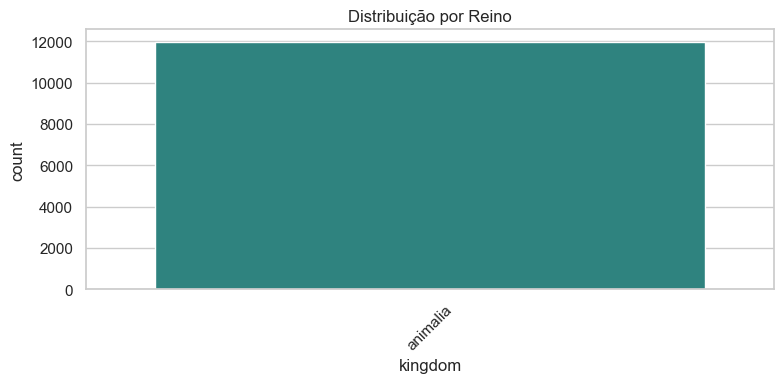

In [7]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='kingdom', order=df['kingdom'].value_counts().index, palette='viridis')
plt.title('Distribuição por Reino')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="border-left: 6px solid #ffffff;margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">🌿 Phylum Distribution Chart</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>This chart displays the 10 most frequent phyla in the dataset, helping to identify the most dominant biological groups represented.</p>
</div>


C:\Users\Tiago Pedro\AppData\Local\Temp\ipykernel_10544\236568653.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_phyla.index, y=top_phyla.values, palette='plasma')


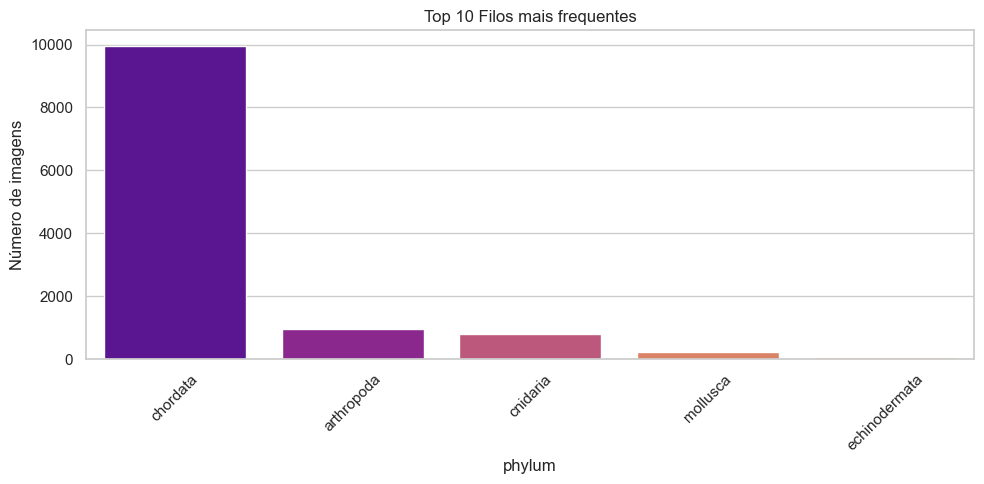

In [8]:
plt.figure(figsize=(10, 5))
top_phyla = df['phylum'].value_counts().nlargest(10)
sns.barplot(x=top_phyla.index, y=top_phyla.values, palette='plasma')
plt.title('Top 10 Filos mais frequentes')
plt.ylabel('Número de imagens')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="border-left: 6px solid #ffffff;margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">🧬 Family Distribution Chart</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>This chart presents the 15 families with the highest number of images. It helps to better understand class imbalance within the classification task.</p>
</div>


C:\Users\Tiago Pedro\AppData\Local\Temp\ipykernel_10544\3607442407.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_families.index, y=top_families.values, palette='magma')


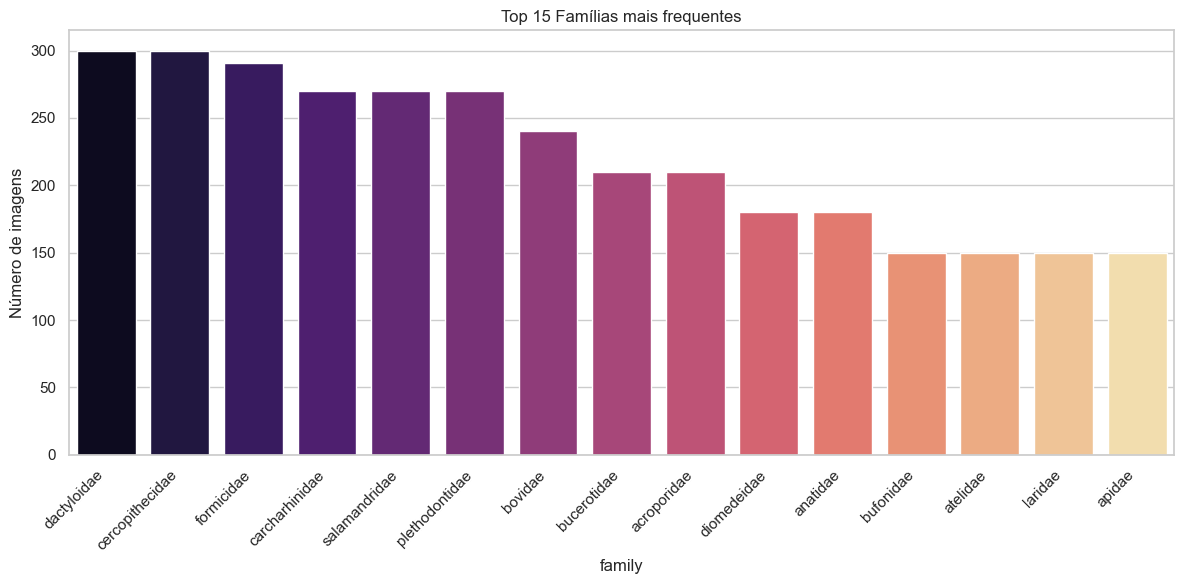

In [9]:
plt.figure(figsize=(12, 6))
top_families = df['family'].value_counts().nlargest(15)
sns.barplot(x=top_families.index, y=top_families.values, palette='magma')
plt.title('Top 15 Famílias mais frequentes')
plt.ylabel('Número de imagens')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<div style="border-left: 6px solid #ffffff;margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">🔍 Dataset Verification</h2>
</div>

<div style="margin-left:60px; padding:10px;"> 
  <p>Before training the model, it is essential to verify the integrity of the dataset. This section includes checks for:</p>
  <ul>
    <li>🗂️ Missing image files or incomplete data entries</li>
    <li>⚖️ Class imbalance in the number of images per family</li>
    <li>🖼️ Visual inspection of sample images from the dataset</li>
  </ul>
</div>


<div style="border-left: 6px solid #ffffff;margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">📁 Missing Image Files Check</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>This step checks whether all image files listed in <strong>metadata.csv</strong> actually exist in their corresponding subdirectories. A scan is performed across the folder structure inside <strong>data/external/</strong>.</p>
</div>


In [10]:
def check_image_exists(image_file):
    for root, dirs, files in os.walk(IMAGE_DIR):
        if image_file in files:
            return True
    return False

In [11]:
missing_verification = False
if missing_verification:
    missing_images = []
    for index, row in df.iterrows():
        image_path = row['file_path']
        image_name = os.path.basename(image_path)
        if not check_image_exists(image_name):
            missing_images.append(image_path)

    print(f"Número de imagens em falta: {len(missing_images)}")

<div style="border-left: 6px solid #ffffff;margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">⚠️ Class Imbalance Check</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>This section displays the distribution of the number of images per family. It also highlights families with fewer than 40 images — such underrepresented classes can lead to issues during model training.</p>
</div>


In [12]:
family_counts = df['family'].value_counts()

print("\n📊 Número de imagens por família (labels):")
print(family_counts)


📊 Número de imagens por família (labels):
family
dactyloidae        300
cercopithecidae    300
formicidae         291
carcharhinidae     270
salamandridae      270
                  ... 
cyprinodontidae     30
alligatoridae       30
balaenidae          30
goodeidae           30
siluridae           29
Name: count, Length: 202, dtype: int64


<div style="border-left: 6px solid #27ae60;margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">🖼️ View Sample Images</h2>
</div>

<div style="margin-left:60px; padding:10px;"> 
  <p>Randomly selects 5 images from the dataset and displays them along with their corresponding families. This step is useful to visually confirm that the file paths are correct and the images match their labels.</p>
</div>


In [13]:
sample_df = df.sample(n=5, random_state=10)

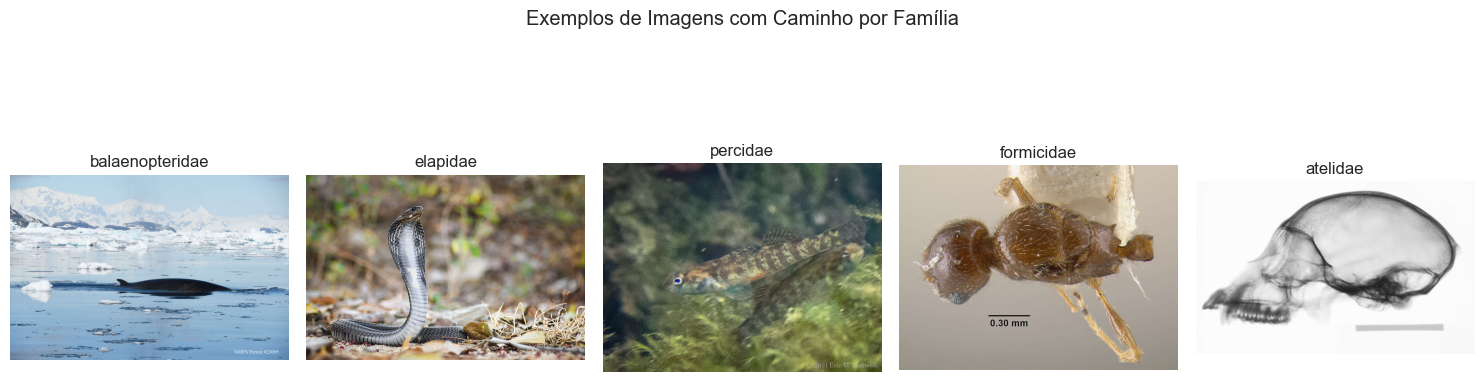

In [14]:
plt.figure(figsize=(15, 5))
for i, row in enumerate(sample_df.itertuples(), 1):
    img = Image.open(IMAGE_DIR / f'{row.file_path}')
    plt.subplot(1, 5, i)
    plt.imshow(img)
    plt.title(row.family)
    plt.axis('off')

plt.suptitle("Exemplos de Imagens com Caminho por Família")
plt.tight_layout()
plt.show()

<div style="border-left: 6px solid #27ae60; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">🖼️ View Outliers Images</h2>
</div>

<div style="margin-left:60px; padding:10px;"> 
  
</div>


<div style="border-left: 6px solid #27ae60; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">⚙️ Preprocessing</h2>
</div>

<div style="margin-left:60px; padding:10px;"> 
  <p>This step prepares the data to be used by the deep learning model. It includes reading and organizing the files, as well as applying the necessary image transformations.</p>
</div>


<div style="border-left: 6px solid #ffffff;margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">🗂️ Standardize Image Paths</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>This step combines the <strong>family</strong> column and the image filename to build the full path to each image stored in the <strong>data/external/</strong> subdirectories.</p>
</div>


In [15]:
df['file_path'] = df['file_path'].apply(lambda x: IMAGE_DIR / x)
print(tabulate(df.head(), headers="keys", tablefmt="fancy_grid", showindex=False, floatfmt=".2f"))

╒══════════════════════════════════════╤══════════════════╤═══════════════╤═══════════╤══════════╤══════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ rare_species_id                      │   eol_content_id │   eol_page_id │ kingdom   │ phylum   │ family           │ file_path                                                                                              │
╞══════════════════════════════════════╪══════════════════╪═══════════════╪═══════════╪══════════╪══════════════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ 75fd91cb-2881-41cd-88e6-de451e8b60e2 │         12853737 │        449393 │ animalia  │ mollusca │ unionidae        │ D:\Repositories\DL_EOLP\data\external\mollusca_unionidae\12853737_449393_eol-full-size-copy.jpg        │
├──────────────────────────────────────┼──────────────────┼───────────────┼───────────┼──────────┼──────────

<div style="border-left: 6px solid #ffffff;margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">🧪 Split into Training, Validation, and Test Sets</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>The dataset is split into training and validation sets. The test set remains separate and untouched, so it can be used later to evaluate the model's final performance.</p>
</div>


In [16]:
train_validation_df, test_df = train_test_split(
    df,
    test_size=0.1,
    stratify=df['family'],
    random_state=42
)

print(f"Treino E Validação: {len(train_validation_df)} | Teste: {len(test_df)}")

Treino E Validação: 10784 | Teste: 1199


In [17]:
test_df.to_csv(ITERIM_DIR / 'test.csv', index=False)

In [18]:
train_df, val_df = train_test_split(
    train_validation_df,
    test_size=0.2,
    stratify=train_validation_df['family'],
    random_state=42
)

print(f"Treino: {len(train_df)} | Validação: {len(val_df)}")

Treino: 8627 | Validação: 2157


In [19]:
train_df.to_csv(ITERIM_DIR / 'train.csv', index=False)
val_df.to_csv(ITERIM_DIR / 'validation.csv', index=False)

<div style="border-left: 6px solid #ffffff;margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">⚙️ Outliers Removal</h2>
</div>

<div style="margin-left:90px; padding:10px; font-size:18px;">
  <p>In this step, we conducted a visual inspection of the dataset to identify and remove outlier images.</p>

  <p>Specifically, we focused on excluding:</p>

  <ul style="line-height:1.6;">
    <li>📸 Images that did not represent any animals (e.g., landscapes, empty frames, artifacts).</li>
    <li>🦓🦒 Images where <strong>more than one animal</strong> was captured simultaneously, which could cause ambiguity in classification.</li>
  </ul>

  <p>All detected outlier filenames were compiled into a CSV file, enabling an automated cleaning of the training dataset.</p>

  <p>This cleaning process ensures a higher quality dataset, reducing noise and improving the learning performance of the models.</p>
</div>


In [20]:
DATA_PATH = PROJECT_ROOT / 'data'
OUTLIER_DIR = DATA_PATH / 'outliers' / 'outliers'

outlier_filenames = sorted([f.name for f in OUTLIER_DIR.glob("*") if f.is_file()])
outliers_df = pd.DataFrame(outlier_filenames, columns=["filename"])

OUTLIERS_PATH = IMAGE_DIR / 'outliers.csv'
outliers_df.to_csv(OUTLIERS_PATH, index=False)

In [21]:
outliers_df = pd.read_csv(OUTLIERS_PATH)
outlier_filenames = outliers_df['filename'].tolist()
train_df['filename'] = train_df['file_path'].apply(lambda x: Path(x).name)
clean_train_df = train_df[~train_df['filename'].isin(outlier_filenames)].copy()

print(f"Antes da limpeza: {len(train_df)} imagens")
print(f"Depois da limpeza: {len(clean_train_df)} imagens")

Antes da limpeza: 8627 imagens
Depois da limpeza: 8462 imagens


<div style="border-left: 6px solid #ffffff;margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">⚙️ Preprocessing with ImageDataGenerator</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>To train convolutional neural networks efficiently, it is essential to apply transformations that normalize the images and increase the diversity of the training set.</p>

  <p>We use <strong>ImageDataGenerator</strong> from the <strong>keras.preprocessing.image</strong> module to perform the following tasks:</p>

  <ul style="line-height: 1.7;">
    <li><strong>Resize and normalize</strong> the images (pixel values scaled between 0 and 1);</li>
    <li><strong>Apply data augmentation</strong> to the training set with random rotations, zooms, horizontal flips, and shifts;</li>
    <li>Create image <strong>batches</strong> ready to be fed directly into the model.</li>
  </ul>

  <p>For the validation set, only normalization is applied, ensuring the evaluation reflects real, unaltered data.</p>

  <p>We begin by testing the transformations on a single training image before applying the preprocessing pipeline to the entire training set.</p>
</div>


<div style="border-left: 6px solid #7B61FF; margin-left:90px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <p style="font-size:20px; margin-left: 30px;">📐 Resizing:</p>
</div>

<div style="margin-left:120px; padding:10px;">
  <p>This step ensures that all images are resized to the same dimensions (e.g., 224x224), which is required by most convolutional neural networks to maintain consistent input shape.</p>
</div>


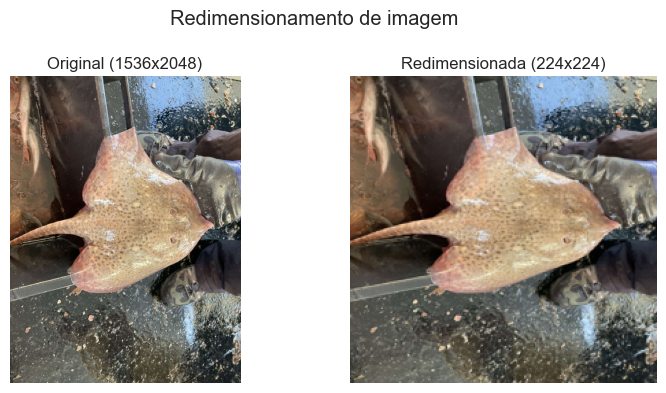

In [22]:
img_ts_path = clean_train_df['file_path'].iloc[0]
img_ts = Image.open(img_ts_path)

resized_img_ts = img_ts.resize((224, 224))

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_ts)
plt.title(f"Original ({img_ts.size[0]}x{img_ts.size[1]})")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_img_ts)
plt.title("Redimensionada (224x224)")
plt.axis('off')

plt.suptitle("Redimensionamento de imagem")
plt.tight_layout()
plt.show()


<div style="border-left: 6px solid #7B61FF; margin-left:90px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <p style="font-size:20px; margin-left: 30px;">⚖️ Normalization:</p>
</div>
<div style="margin-left:120px; padding:10px;">
  <p>This step scales pixel values to a range of [0, 1], which improves model training stability and speeds up convergence.</p>
</div>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


 Antes da normalização (0-255):
[129 100  86]

 Após normalização (0-1):
[ 0.01176471 -0.21568627 -0.3254902 ]


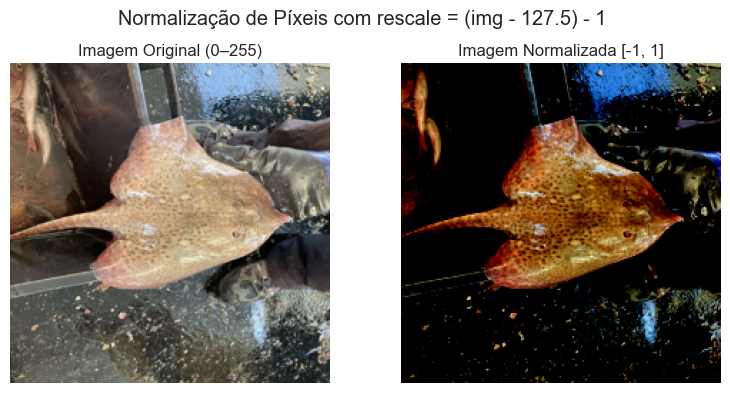

In [23]:
resized_img_ts_array = np.array(resized_img_ts)

resized_img_ts_normalizada = (resized_img_ts_array / 127.5) - 1

print(" Antes da normalização (0-255):")
print(resized_img_ts_array[0][0])

print("\n Após normalização (0-1):")
print(resized_img_ts_normalizada[0][0])

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(resized_img_ts_array.astype('uint8'))
plt.title("Imagem Original (0–255)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_img_ts_normalizada)
plt.title("Imagem Normalizada [-1, 1]")
plt.axis('off')

plt.suptitle("Normalização de Píxeis com rescale = (img - 127.5) - 1 ")
plt.tight_layout()
plt.show()

<div style="border-left: 6px solid #7B61FF; margin-left:90px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <p style="font-size:20px; margin-left: 30px;">⚫ Grayscale Conversion:</p>
</div>
<div style="margin-left:120px; padding:10px;">
  <p>This step converts RGB images to grayscale by reducing them to a single channel. It is useful when color is not a critical feature for classification.</p>
</div>


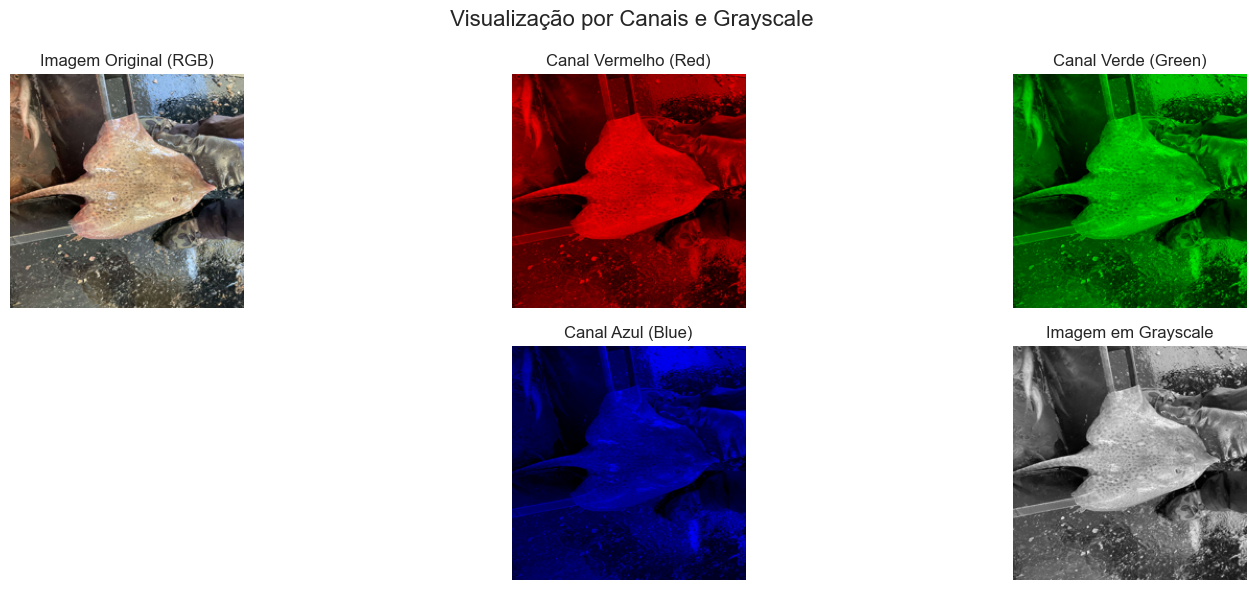

In [24]:
img_array = np.array(resized_img_ts)

red_channel = img_array.copy()
green_channel = img_array.copy()
blue_channel = img_array.copy()

red_channel[:, :, 1] = 0
red_channel[:, :, 2] = 0

green_channel[:, :, 0] = 0
green_channel[:, :, 2] = 0

blue_channel[:, :, 0] = 0
blue_channel[:, :, 1] = 0

resized_img_ts_gray = resized_img_ts.convert('L')

plt.figure(figsize=(16, 6))

plt.subplot(2, 3, 1)
plt.imshow(resized_img_ts)
plt.title("Imagem Original (RGB)")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(red_channel)
plt.title("Canal Vermelho (Red)")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(green_channel)
plt.title("Canal Verde (Green)")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(blue_channel)
plt.title("Canal Azul (Blue)")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(resized_img_ts_gray, cmap='gray')
plt.title("Imagem em Grayscale")
plt.axis('off')

plt.suptitle(" Visualização por Canais e Grayscale", fontsize=16)
plt.tight_layout()
plt.show()

<div style="border-left: 6px solid #7B61FF; margin-left:90px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <p style="font-size:20px; margin-left: 30px;">🧼 Background Removal:</p>
</div>
<div style="margin-left:120px; padding:10px;">
  <p>This step removes the background from each image, allowing the model to focus only on the subject. This is particularly useful for isolating species in image classification tasks.</p>
</div>


In [25]:
def remove_background_and_preprocess(img):
    img = img.convert("RGBA")
    img_no_bg = remove(img)

    img_array = np.array(img_no_bg)

    if img_array.shape[-1] == 4:
        img_array = img_array[:, :, :3]

    img_array = img_array.astype(np.float32)

    return preprocess_input(img_array)

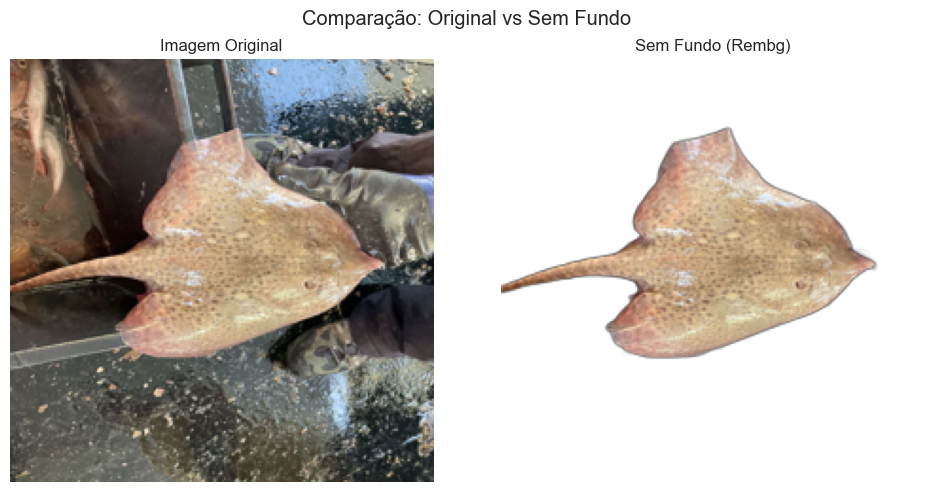

In [26]:
original = resized_img_ts.convert("RGBA")

original_bg_resize = remove(original)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title("Imagem Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(original_bg_resize)
plt.title("Sem Fundo (Rembg)")
plt.axis('off')

plt.suptitle("Comparação: Original vs Sem Fundo")
plt.tight_layout()
plt.show()

<div style="border-left: 6px solid #7B61FF; margin-left:90px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <p style="font-size:20px; margin-left: 30px;">🛡️ Circle Mask:</p>
</div>

<div style="margin-left:120px; padding:10px; font-family:Arial, sans-serif; font-size:16px;"> 
  <p>In this section, we apply a circular mask to the images, darkening the peripheral regions while keeping the central area intact and visible.</p>

  <p>This technique is inspired by data cleaning strategies to remove irrelevant background information, helping the model focus on the key features necessary for accurate classification.</p>

  <p>The circle mask is centered on the image and its radius can be adjusted according to the dataset's specific needs.</p>
</div>


In [27]:
def circle_mask(img_path, img_size):
    img = cv.imread(img_path)
    img = cv.resize(img, (img_size[1], img_size[0]))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    center = (img.shape[1] // 2, img.shape[0] // 2)
    radius = 90

    mask = np.zeros(img_size, dtype=np.uint8)
    mask = cv.circle(mask, center, radius, 255, -1)
    color = np.full_like(img, (0,0,0))

    masked_img = cv.bitwise_and(img, img, mask=mask)
    masked_color = cv.bitwise_and(color, color, mask=255-mask)
    result = cv.add(masked_img, masked_color)

    return img, result


def show_circle_mask(img_path, img_size):
    img, mask = circle_mask(img_path, img_size)

    plt.figure(figsize=(15, 10))
    plt.subplot(131), plt.imshow(img), plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(mask), plt.title('Mask')
    plt.xticks([]), plt.yticks([])

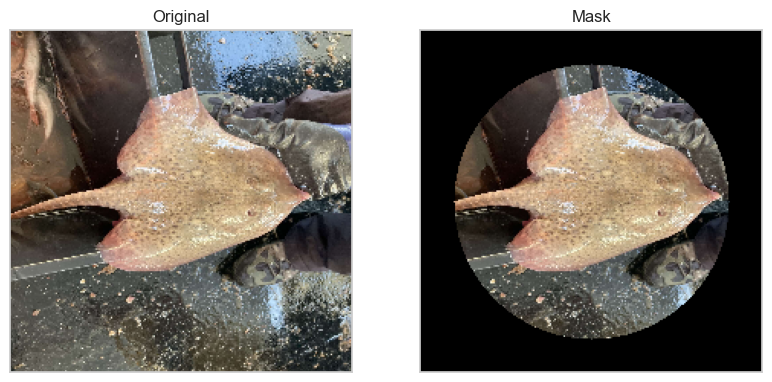

In [28]:
show_circle_mask(img_ts_path, (224, 224))

<div style="border-left: 6px solid #7B61FF; margin-left:90px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <p style="font-size:20px; margin-left: 30px;">🧼 Blur Image:</p>
</div>

<div style="margin-left:120px; padding:10px; font-family:Arial, sans-serif; font-size:16px;"> 
  <p>In this section, we apply a bilinear blur effect to the images. This process helps simulate image imperfections and can serve as a data augmentation technique, increasing the model's robustness during training.</p>

  <p>We blur the peripheral regions of the image while maintaining the central area relatively sharp, preserving the key features needed for classification.</p>
</div>


In [29]:
def billiniar_blur_img(img_path, img_size):
    
    img = cv.imread(img_path)
    img = cv.resize(img, (img_size[1], img_size[0]))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    circle_radius = img.shape[0] // 2

    mask = np.zeros_like(img)
    center = (img.shape[1] // 2, img.shape[0] // 2)
    mask = cv.circle(mask, center, circle_radius, (1, 1, 1), thickness=-1)
    
    mask_inv = 1 - mask
    
    result = img.copy()
    blurred_inner_outer_img = cv.bilateralFilter(result, 10, 100, 100)
    result[mask_inv == 1] = blurred_inner_outer_img[mask_inv == 1]
    
    return result

def show_blur(img_path, img_size):
    img = cv.imread(img_path)
    img = cv.resize(img, (img_size[1], img_size[0]))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    billiniar = billiniar_blur_img(img_path, img_size)

    plt.figure(figsize=(15, 10))
    plt.subplot(131), plt.imshow(img), plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(billiniar), plt.title('Billiniar Blur')
    plt.xticks([]), plt.yticks([])

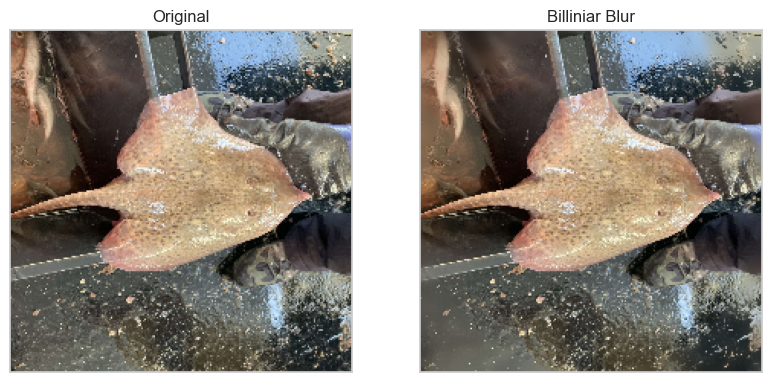

In [30]:
show_blur(img_ts_path, (224, 224))

<div style="border-left: 6px solid #7B61FF; margin-left:90px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <p style="font-size:20px; margin-left: 30px;">🔁 Data Augmentation:</p>
</div>
<div style="margin-left:120px; padding:10px;">
  <p>This technique generates new variations of the training images by applying random transformations such as rotations, flips, zooms, and shifts. It helps improve the model's generalization by simulating different perspectives of the same object.</p>
</div>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9914106].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.981933].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99341595].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99085784].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99037683].


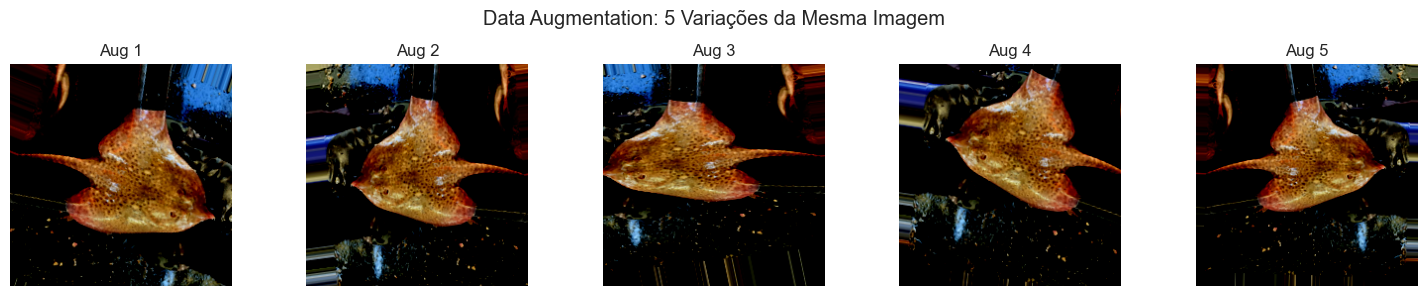

In [31]:
resized_img_ts_array = img_to_array(resized_img_ts)
resized_img_ts_array = resized_img_ts_array.reshape((1,) + resized_img_ts_array.shape)

augmentador = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

plt.figure(figsize=(15, 3))
for i, batch in enumerate(augmentador.flow(resized_img_ts_array, batch_size=1), 1):
    plt.subplot(1, 5, i)
    plt.imshow(batch[0])
    plt.axis('off')
    plt.title(f"Aug {i}")
    if i == 5:
        break

plt.suptitle("Data Augmentation: 5 Variações da Mesma Imagem")
plt.tight_layout()
plt.show()

<div style="border-left: 6px solid #7B61FF; margin-left:90px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <p style="font-size:20px; margin-left: 30px;">✅ Final Preprocessing Selection:</p>
</div>
<div style="margin-left:120px; padding:10px;">
  <p>After testing individual preprocessing techniques, we apply the final selected pipeline to the full training set. This ensures consistency in data preparation before feeding it into the deep learning model.</p>
</div>


In [32]:
train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True          
)

val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [33]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

clean_train_df['file_path'] = clean_train_df['file_path'].astype(str)
val_df['file_path'] = val_df['file_path'].astype(str)


train_generator = train_datagen.flow_from_dataframe(
    clean_train_df,
    x_col='file_path',
    y_col='family',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='file_path',
    y_col='family',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 8462 validated image filenames belonging to 202 classes.
Found 2157 validated image filenames belonging to 202 classes.


<div style="border-left: 6px solid #ffffff;margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <h2 style="margin-top: 0; font-size:24px;">⚙️ Export the Final Pre-Processed Images</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>Export the final pre-processed images to the <strong>data/processed/</strong> directory, organizing them into <strong>train</strong>, <strong>validation</strong>, and <strong>test</strong> folders.</p>
</div>


<div style="border-left: 6px solid #7B61FF; margin-left:90px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <p style="font-size:20px; margin-left: 30px;">🚀 Training:</p>
</div>
<div style="margin-left:120px; padding:10px;">
  <p>This step involves fitting the deep learning model to the training data using the selected architecture and hyperparameters.</p>
</div>


In [34]:
total_saved = 0
N_VARIACOES = 3

for idx, row in clean_train_df.iterrows():
    img_path = row['file_path']
    classe = row['family']

    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    class_dir = TRAIN_DIR / classe
    class_dir.mkdir(parents=True, exist_ok=True)

    count = 0
    for batch in train_datagen.flow(x, batch_size=1):
        aug_img = array_to_img(batch[0])
        filename = f"{classe}_proc_{idx}.jpg"
        aug_img.save(class_dir / filename)
        count += 1
        total_saved += 1

        if count >= N_VARIACOES:
            break

print(f"✅ {total_saved} processed images saved in {TRAIN_DIR}")

c:\Users\Tiago Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (115600000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


KeyboardInterrupt: 

<div style="border-left: 6px solid #7B61FF; margin-left:90px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <p style="font-size:20px; margin-left: 30px;">✅ Validation:</p>
</div>
<div style="margin-left:120px; padding:10px;">
  <p>The model is evaluated on the validation set during training to monitor performance and prevent overfitting.</p>
</div>


In [ ]:
val_class_map = {v: k for k, v in val_generator.class_indices.items()}
num_batches_val = len(val_generator)
saved_val_count = 0

for batch_index, (images, labels) in enumerate(val_generator):
    for i in range(len(images)):
        img = array_to_img(images[i])
        label_index = np.argmax(labels[i])
        class_name = val_class_map[label_index]

        class_dir = VAL_DIR / class_name
        class_dir.mkdir(parents=True, exist_ok=True)

        filename = f"{class_name}_{batch_index}_{i}.jpg"
        img.save(class_dir / filename)
        saved_val_count += 1

    if batch_index >= num_batches_val - 1:
        break

val_generator.reset()

print(f"✅ Exportadas {saved_val_count} imagens para {VAL_DIR}")

✅ Exportadas 2157 imagens para D:\Repositories\DL_EOLP\data\processed\val


<div style="border-left: 6px solid #7B61FF; margin-left:90px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px;">
  <p style="font-size:20px; margin-left: 30px;">🧪 Testing:</p>
</div>
<div style="margin-left:120px; padding:10px;">
  <p>The final model is evaluated on the test set, which contains data the model has never seen before. This provides an unbiased estimate of its real-world performance.</p>
</div>


In [ ]:
copied_count = 0

for _, row in test_df.iterrows():
    origem = row['file_path']
    classe = row['family']

    destino_classe = TEST_DIR / classe
    destino_classe.mkdir(parents=True, exist_ok=True)

    destino = destino_classe / origem.name

    if not destino.exists():
        shutil.copy2(origem, destino)
        copied_count += 1

print(f"✅ {copied_count} imagens de teste copiadas para {TEST_DIR}")

✅ 1199 imagens de teste copiadas para D:\Repositories\DL_EOLP\data\processed\test
